<a href="https://colab.research.google.com/github/shreyansh273/Jane-Street-Market-Prediction/blob/main/Jane_Street_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

**Importing files from Kaggle**

In [ ]:
uploaded = files.upload()

Saving kaggle.json to kaggle (1).json


In [ ]:
!cp kaggle.json /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c jane-street-market-prediction

__init__.py: Skipping, found more recently modified local copy (use --force to force download)
competition.cpython-37m-x86_64-linux-gnu.so: Skipping, found more recently modified local copy (use --force to force download)
features.csv: Skipping, found more recently modified local copy (use --force to force download)
example_sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)
example_test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


**Viewing the imported files**

In [ ]:
!ls

 competition.cpython-37m-x86_64-linux-gnu.so   features.csv	  kaggle.json
 example_sample_submission.csv		       __init__.py	  sample_data
 example_test.csv.zip			      'kaggle (1).json'   train.csv.zip


In [106]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

**Importing train and test datasets into pandas dataframe**

In [64]:
train = pd.read_csv('train.csv.zip', compression='zip')
test = pd.read_csv('example_test.csv.zip', compression='zip')
features = pd.read_csv('features.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float64(135), int64(3)
memory usage: 2.5 GB


In [66]:
train.feature_0 = train.feature_0.astype(np.int8)
train.date= train.date.astype(np.int16)
train.ts_id = train.ts_id.astype(np.int32)

In [ ]:
for i in train:
    if train[i].dtype == np.float64:
        if (((train[i] < .0001) & (train[i] > -.0001)).mean()) > .001:
            print(i)

weight
resp_1
resp_2
resp_3
resp_4
resp


In [65]:
for i in train:
    if train[i].dtype == np.float64:
        if (((train[i] < .0001) & (train[i] > -.0001)).mean()) < .001:
            train[i] = train[i].astype(np.float32)
            gc.collect();

In [67]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2390491 entries, 0 to 2390490
Columns: 138 entries, date to ts_id
dtypes: float32(129), float64(6), int16(1), int32(1), int8(1)
memory usage: 1.3 GB


In [68]:
train.sort_values(by= ['date','ts_id'],inplace=True)
train.head()

date     weight    resp_1  ...  feature_128  feature_129  ts_id
0     0   0.000000  0.009916  ...     2.301488    11.445807      0
1     0  16.673515 -0.002828  ...    -1.304614     1.898684      1
2     0   0.000000  0.025134  ...     6.638248     9.427299      2
3     0   0.000000 -0.004730  ...     3.856384     1.013469      3
4     0   0.138531  0.001252  ...     0.362636     3.926633      4

[5 rows x 138 columns]

In [69]:
train['action'] = np.where(train['resp'] > 0,1,0)
train.action = train.action.astype('category')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


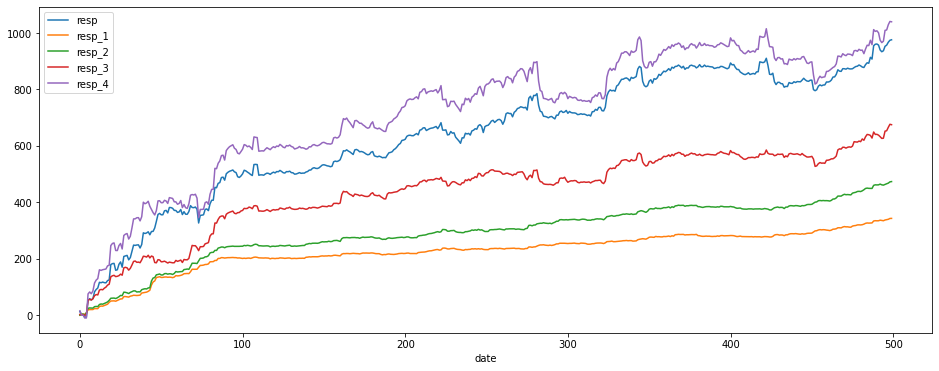

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
train.groupby('date')['resp','resp_1','resp_2','resp_3','resp_4'].sum().cumsum().plot(ax=ax)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


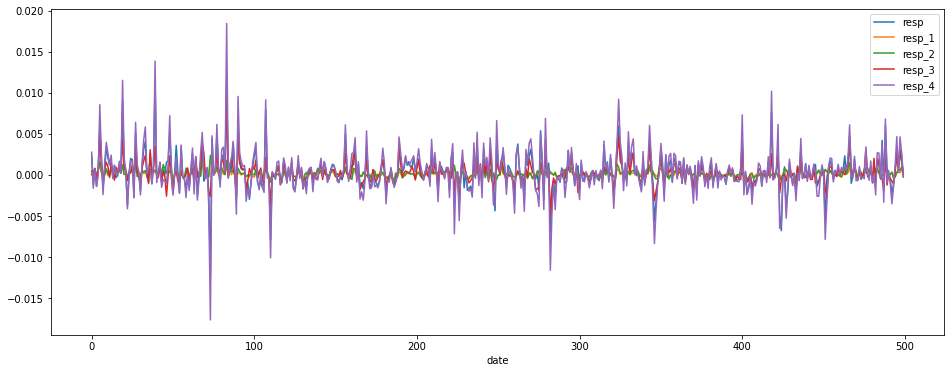

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
train.groupby('date')['resp','resp_1','resp_2','resp_3','resp_4'].mean().plot(ax=ax)

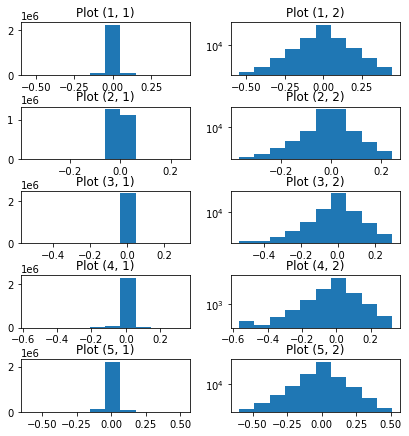

In [ ]:
cols = ['resp','resp_1','resp_2','resp_3','resp_4']
n_rows = len(cols)
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols,figsize=(6,6))
fig.tight_layout() 
for row_num in range(n_rows):
    for col_num in range(n_cols):
        ax = axes[row_num][col_num]
        if(col_num==0):
          ax.hist(train[cols[row_num]])
        else:
          ax.hist(train[cols[row_num]], log=True)
        ax.set_title(f'Plot ({row_num+1}, {col_num+1})')

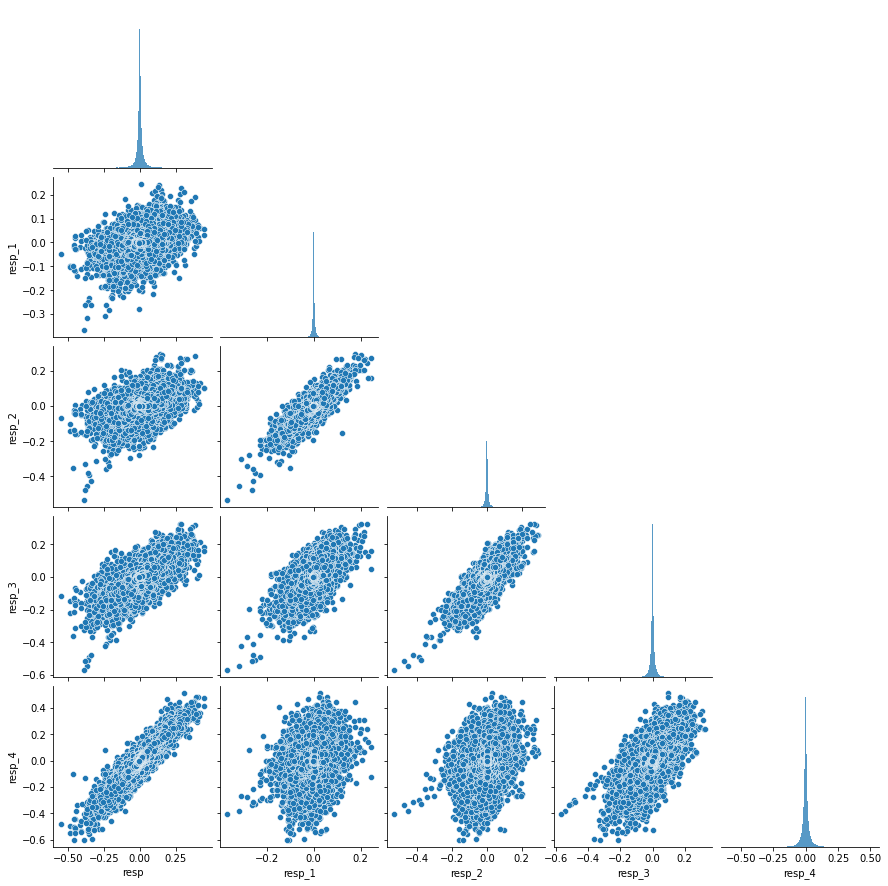

In [ ]:
sns.pairplot(train[['resp','resp_1', 'resp_2', 'resp_3', 'resp_4']], corner=True)

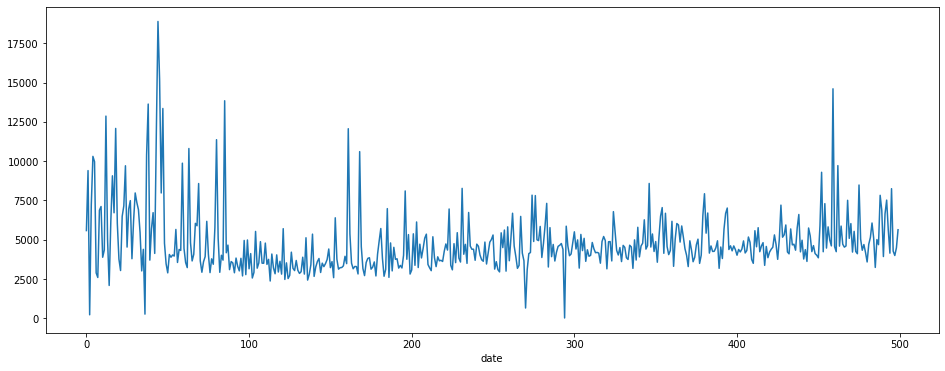

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(16,6))
train.groupby('date')['resp'].count().plot(ax=ax)

([<matplotlib.patches.Wedge at 0x7f5161af5358>,
 [Text(-1.0306190832847428, 0.6146741455188403, ''),
  Text(1.0306190832847426, -0.6146741455188404, '')],
 [Text(-0.944734159677681, 0.563451300058937, '83%'),
  Text(0.9447341596776809, -0.5634513000589371, '17%')])

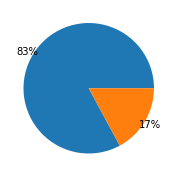

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(3,3))
len_nonzero_wt = len(train.weight[train.weight!=0])
len_zero_wt = len(train.weight[train.weight==0])
data = [len_nonzero_wt, len_zero_wt] 
axes.pie(data, autopct='%1.0f%%', pctdistance=1.1, labeldistance=1.2)

(array([1.890568e+06, 6.192100e+04, 1.639100e+04, 6.575000e+03,
        2.680000e+03, 1.443000e+03, 8.400000e+02, 5.030000e+02,
        2.840000e+02, 8.200000e+01]),
 array([6.91244239e-03, 1.67355927e+01, 3.34642730e+01, 5.01929532e+01,
        6.69216335e+01, 8.36503138e+01, 1.00378994e+02, 1.17107674e+02,
        1.33836355e+02, 1.50565035e+02, 1.67293715e+02]),
 <a list of 10 Patch objects>)

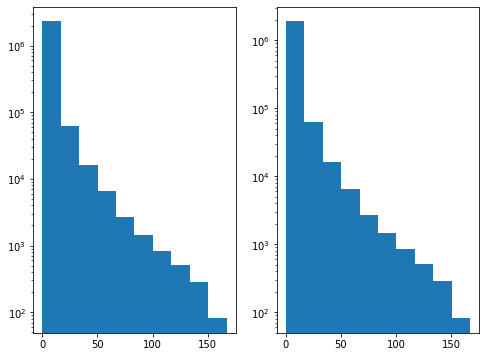

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(8,6))
ax = axes[0]
ax.hist(train.weight, log=True)
ax1 = axes[1]
ax1.hist(train.weight[train.weight!=0], log=True)

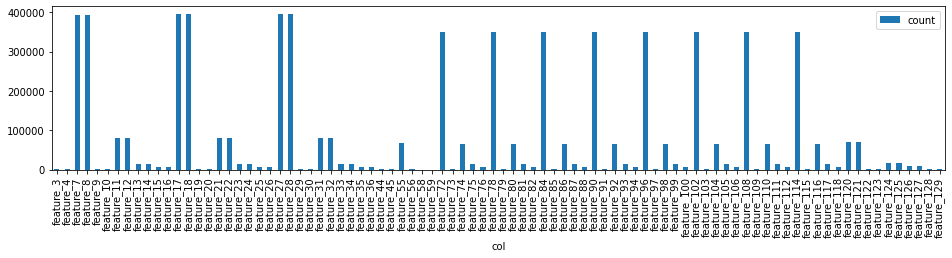

In [85]:
nulls = pd.DataFrame(train.isnull().sum()).reset_index()
nulls.columns = ['col','count']
nulls = nulls.loc[nulls['count']!=0]
fig, axes = plt.subplots(1,1, figsize=(16,3))
nulls.plot(x='col', y='count', kind='bar', ax=axes)

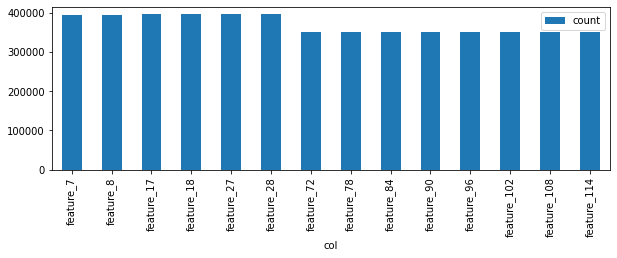

In [84]:
nulls_gt_10per = nulls.loc[nulls['count'] >0.1*len(train)]
fig, axes = plt.subplots(1,1, figsize=(10,3))
nulls_gt_10per.plot(x='col', y='count', kind='bar', ax=axes)

In [95]:
train[['resp','resp_1','resp_2','resp_3','resp_4','weight']+nulls_gt_10per.col.tolist()].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [ ]:
train.drop(columns=nulls_gt_10per.col.tolist(),inplace=True)

In [98]:
train.head()

date     weight    resp_1    resp_2  ...  feature_128  feature_129  ts_id  action
0     0   0.000000  0.009916  0.014079  ...     2.301488    11.445807      0       1
1     0  16.673515 -0.002828 -0.003226  ...    -1.304614     1.898684      1       0
2     0   0.000000  0.025134  0.027607  ...     6.638248     9.427299      2       1
3     0   0.000000 -0.004730 -0.003273  ...     3.856384     1.013469      3       0
4     0   0.138531  0.001252  0.002165  ...     0.362636     3.926633      4       0

[5 rows x 125 columns]

In [100]:
(train.iloc[:,7:-2].std() / train.iloc[:,7:-2].mean()).head(5)

feature_0    101.635945
feature_1      6.652154
feature_2      6.905722
feature_3    217.145702
feature_4    421.125070
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5161b4e390>,
      dtype=object)

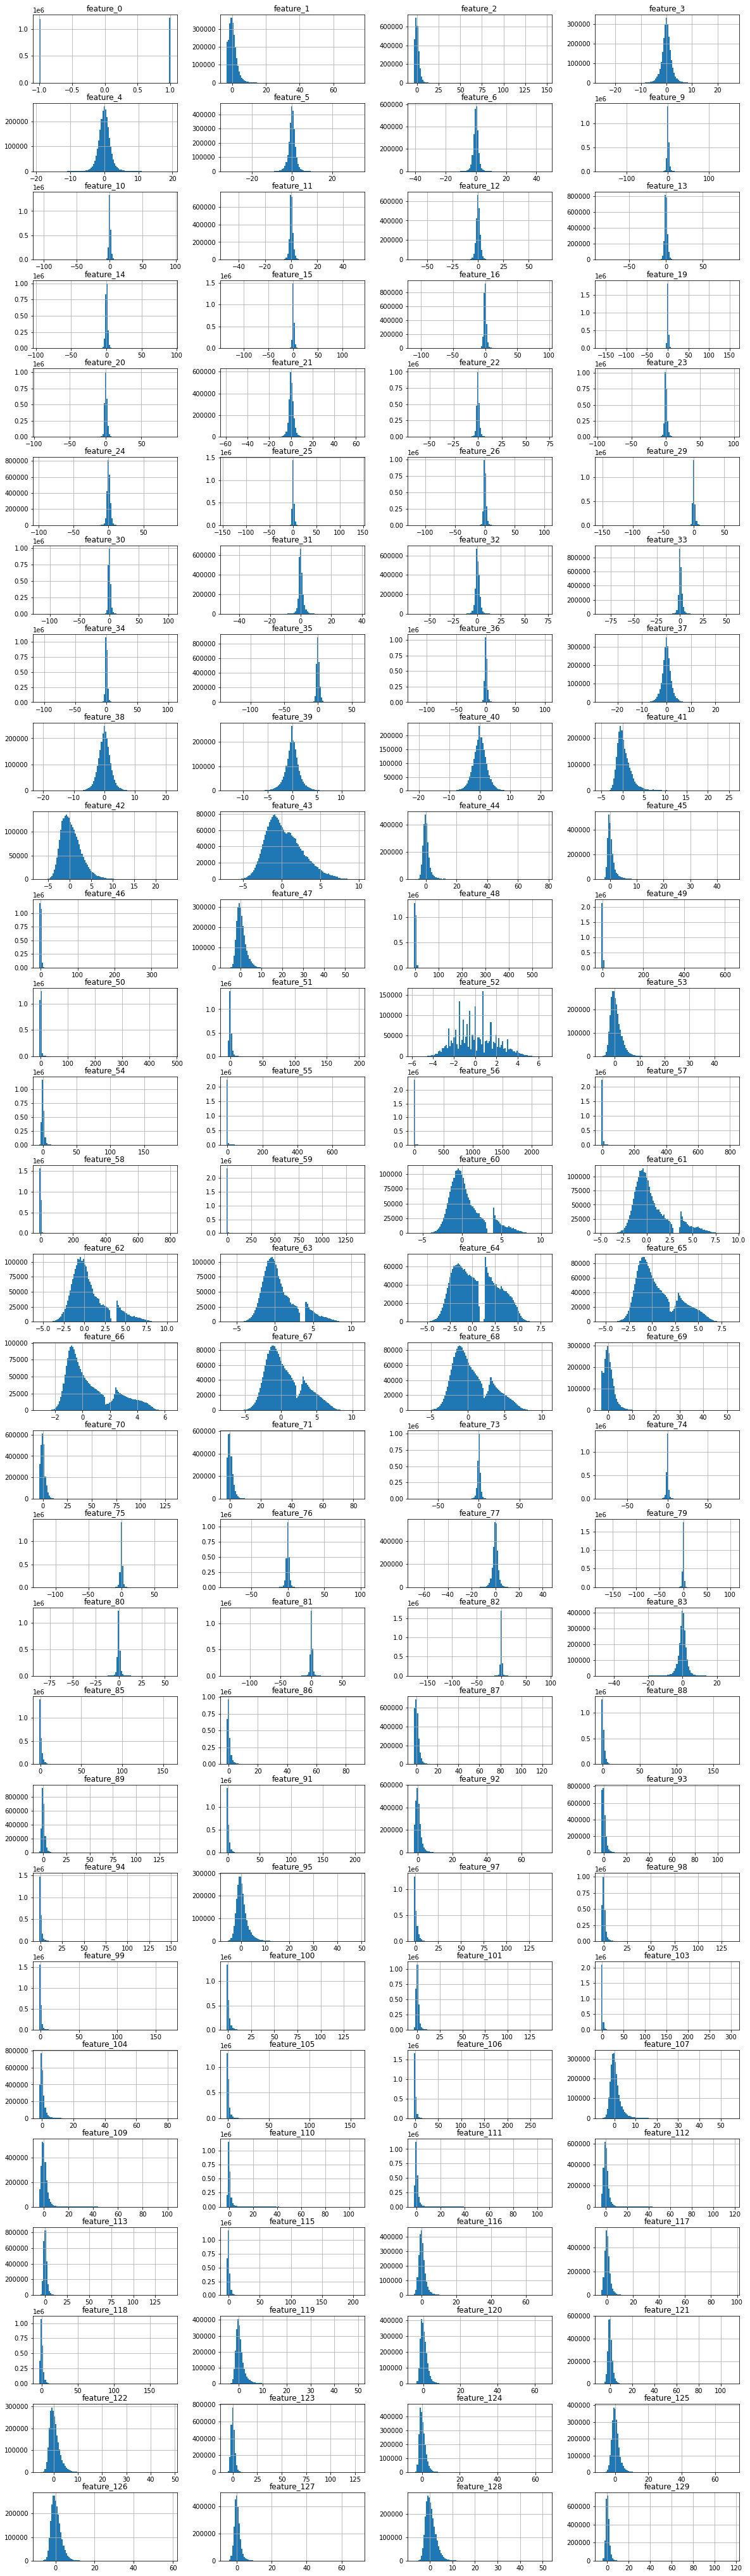

In [103]:
train.iloc[:,7:-2].hist(bins=100,figsize=(20,74),layout=(29,4))

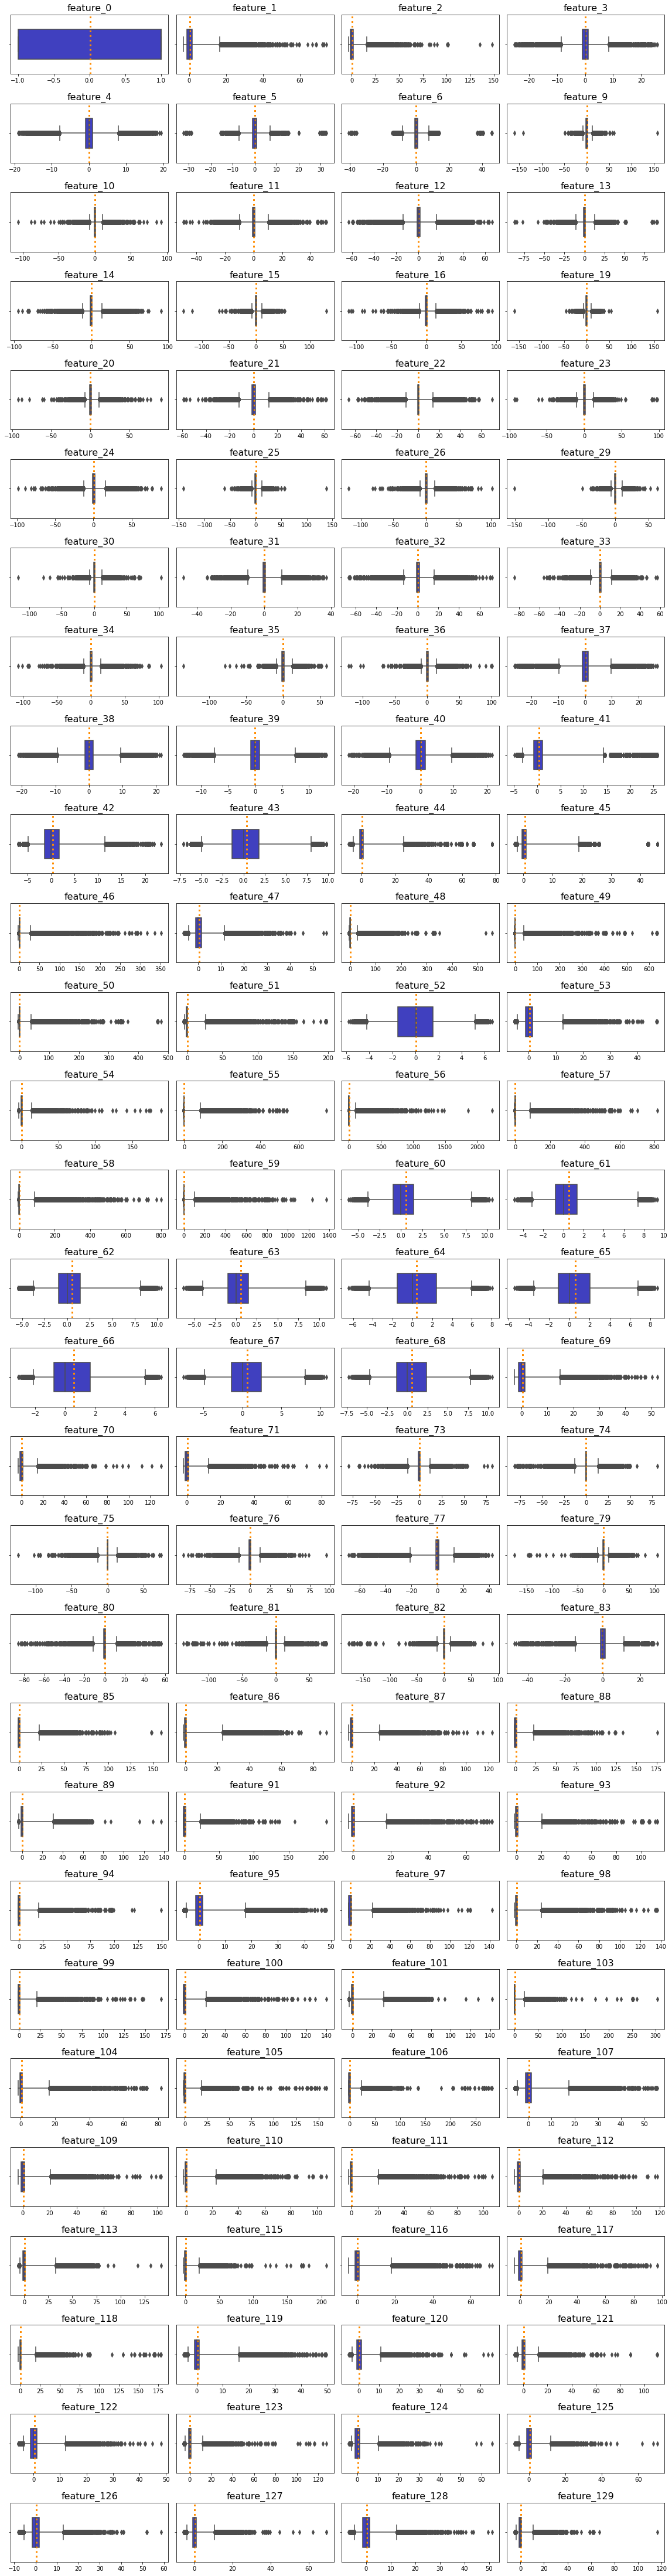

In [109]:
fig = plt.figure(figsize=(20,80))
grid =  gridspec.GridSpec(29,4,figure=fig,hspace=.5,wspace=.05)
featstr = [i for i in train.columns[7:-2]]
counter = 0
for i in range(29):
    for j in range(4):
        subf = fig.add_subplot(grid[i, j]);
        sns.boxplot(x= train[featstr[counter]],saturation=.5,color= 'blue', ax= subf,width=.5,whis=(.1,99.9));
        subf.axvline(train[featstr[counter]].mean(),color= 'darkorange', label='Mean', linestyle=':',linewidth=3)
        subf.set_xlabel('')
        subf.set_title('{}'.format(featstr[counter]),fontsize=16)
        counter += 1
plt.show()

In [112]:
#As most of the values are centered around the mean we replace the null values in the remaining columns with mean
train.fillna(train.mean(axis=0),inplace=True)
train.isnull().sum()

date           0
weight         0
resp_1         0
resp_2         0
resp_3         0
              ..
feature_127    0
feature_128    0
feature_129    0
ts_id          0
action         0
Length: 125, dtype: int64

In [114]:
corr = train.iloc[:,7:-2].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

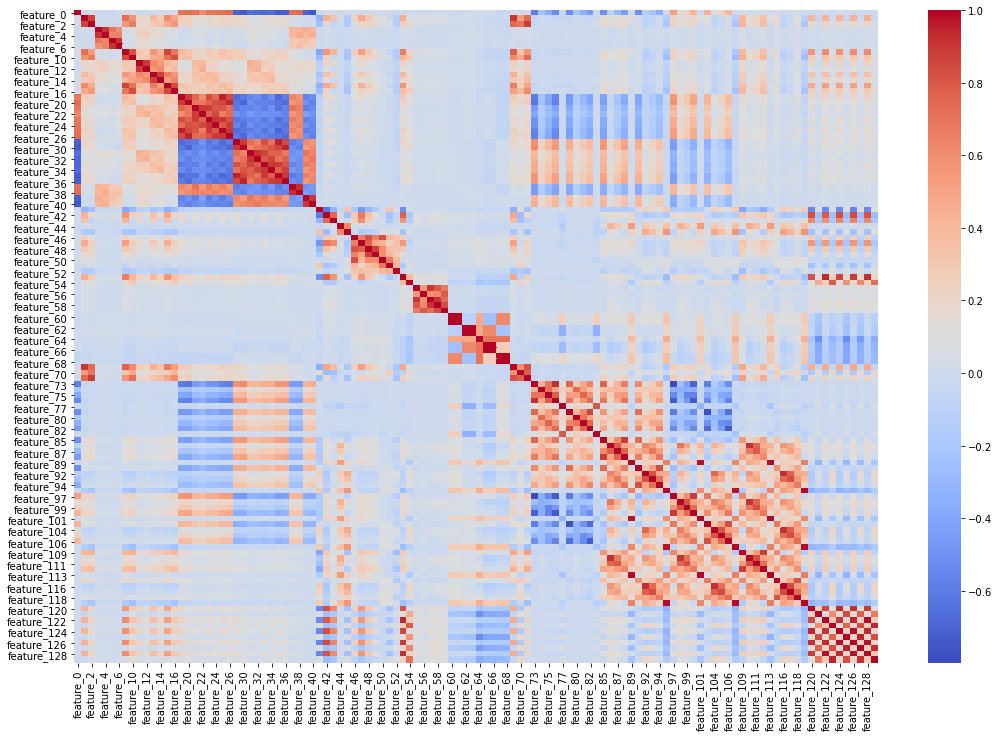

In [115]:
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(1,1,1)
sns.heatmap(corr,ax= ax, cmap='coolwarm')

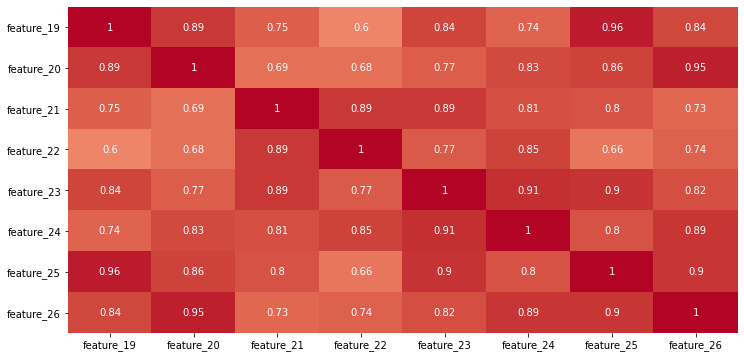

In [117]:
featstr2 = [ i for i in featstr if i not in ['feature_41','feature_64']]
plt.figure(figsize=(12,6)) 
sns.heatmap(train[featstr2[15:23]].corr(),center=0,cmap='coolwarm',annot=True,cbar=False)

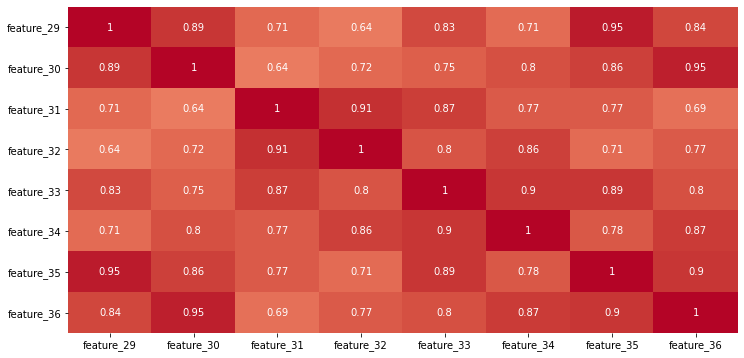

In [119]:
plt.figure(figsize=(12,6)) 
sns.heatmap(train[featstr2[23:31]].corr(),cmap='coolwarm')